In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("gdrive/MyDrive/Colab Notebooks")

In [ ]:
data = pd.read_excel('go_track_tracks.xlsx')
data

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
158,38081,24,30.051732,0.218756,6.574,2,0,0,1,carro
159,38082,24,30.173788,0.255387,7.706,3,0,0,1,carro
160,38084,25,1.153772,0.013001,0.015,1,3,2,2,721 - CASTELO BRANCO SUISSA
161,38090,26,0.843223,0.007116,0.006,3,1,2,2,002 - FERNANDO COLLOR DIA


In [ ]:
data = data[['id','speed','distance']]

In [ ]:
print(data)

        id      speed  distance
0        1  19.210586     2.652
1        2  30.848229     5.290
2        3  13.560101     0.918
3        4  19.766679     7.700
4        8  25.807401     3.995
..     ...        ...       ...
158  38081  30.051732     6.574
159  38082  30.173788     7.706
160  38084   1.153772     0.015
161  38090   0.843223     0.006
162  38092   1.372998     0.023

[163 rows x 3 columns]


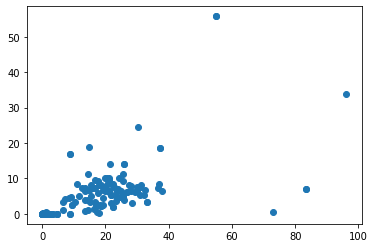

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data.speed, data.distance)
plt.show()

In [ ]:
x_array = np.array(data)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)

<function matplotlib.pyplot.show>

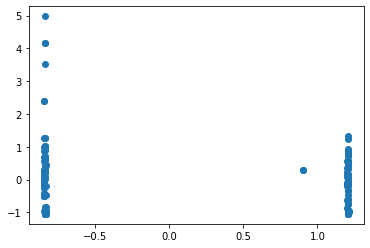

In [ ]:
plt.scatter(x_scaled[:,0], x_scaled[:,1])
plt.show

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[-0.83476527, -0.18704007, -0.19031829],
       [-0.61026508,  2.7843404 ,  2.536265  ],
       [ 1.19623833, -0.13029602, -0.0920966 ]])

<function matplotlib.pyplot.show>

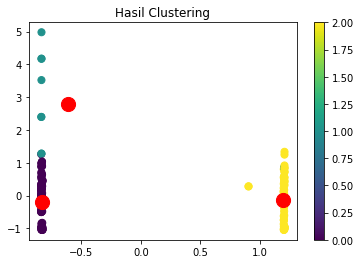

In [ ]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=50, c = kmeans.labels_)
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = 'red', s=200)
plt.title("Hasil Clustering")
plt.colorbar(output)
plt.show

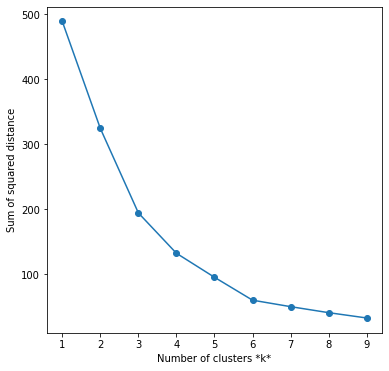

In [ ]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');